In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import statsmodels.stats.api as sms
import numpy as np
from scipy.stats import levene
from statsmodels.stats.power import TTestIndPower



In [41]:
#Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/FatimaZohra1999/A4_data/main/INF2178_A4_data.csv")
df

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


# EDA

In [35]:
# Summary of the dataset
summary = df.describe(include='all').transpose()

summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,294.0,NaN,NaN,NaN,190.421769,106.68674,0.0,99.0,195.5,282.75,371.0
Subject ID,294,150,OAS2_0001,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MRI ID,294,294,OAS2_0001_MR1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Group,294,3,Nondemented,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visit,294.0,NaN,NaN,NaN,1.489796,0.500748,1.0,1.0,1.0,2.0,2.0
MR Delay,294.0,NaN,NaN,NaN,349.785714,400.74152,0.0,0.0,0.0,671.5,1707.0
M/F,294,2,F,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hand,294,1,R,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,294.0,NaN,NaN,NaN,76.411565,7.607074,60.0,71.0,76.0,81.0,98.0
EDUC,294.0,NaN,NaN,NaN,14.561224,2.884818,6.0,12.0,14.5,16.0,23.0


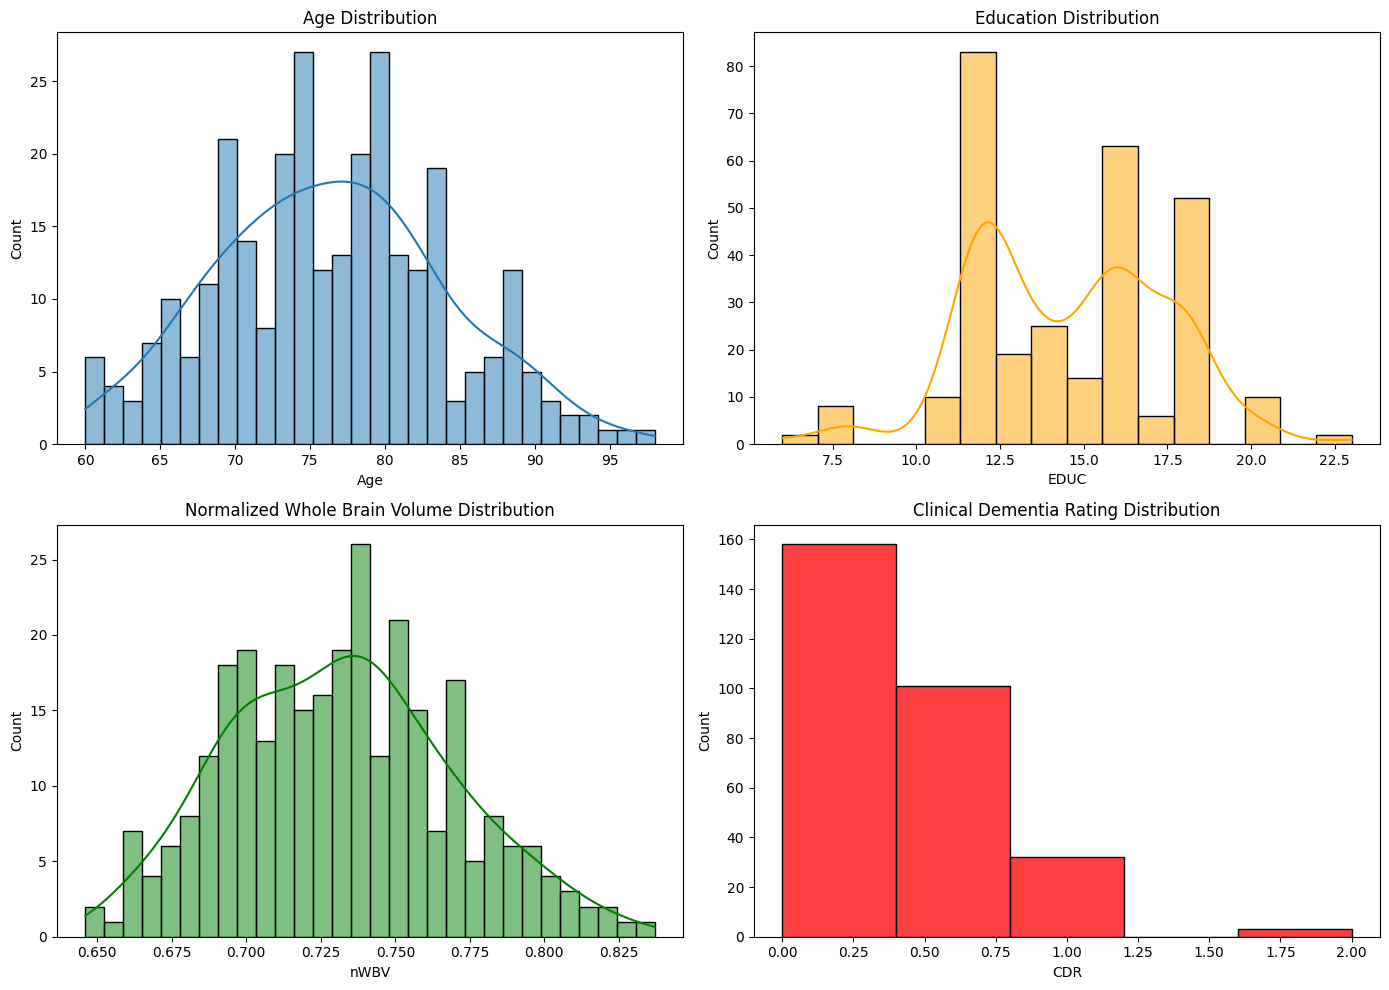

In [36]:
# Prepare for visualization of distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Distribution of age
sns.histplot(df['Age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')

# Distribution of education
sns.histplot(df['EDUC'], bins=16, ax=axes[0, 1], kde=True, color='orange')
axes[0, 1].set_title('Education Distribution')

# Distribution of nWBV
sns.histplot(df['nWBV'], bins=30, ax=axes[1, 0], kde=True, color='green')
axes[1, 0].set_title('Normalized Whole Brain Volume Distribution')

# Distribution of CDR
sns.histplot(df['CDR'], bins=5, ax=axes[1, 1], kde=False, color='red')
axes[1, 1].set_title('Clinical Dementia Rating Distribution')

plt.tight_layout()
plt.show()



- Age: Ranges from 60 to 98 years with a mean of 76.41 years.
- Education (EDUC): Varies from 6 to 23 years of education with an average of about 14.56 years.
- Normalized Whole Brain Volume (nWBV): Has a range from approximately 0.646 to 0.837, with an average of 0.731.
- Clinical Dementia Rating (CDR): Shows values primarily at 0, with some higher values indicating varying stages of dementia.

# RQ1: Is there a significant difference in brain volume between demented and non-demented groups after accounting for age, gender, and education level?

**Hypothesis:** There will be a significant difference in brain volume (nWBV) between the two groups even after controlling for age, gender, and education.


In [38]:
# Prepare the data for mixed-effects ANOVA
# For RQ1, we need to consider 'Group' as a fixed effect and 'Subject ID' as a random effect
# We will control for 'Age', 'M/F', and 'EDUC'

# Handle categorical data for gender
df['M/F'] = df['M/F'].map({'M': 0, 'F': 1})

# Replace missing values in 'SES' with the median value
df['SES'].fillna(df['SES'].median(), inplace=True)

# Remove any remaining missing values for the mixed-effects ANOVA analysis
df.dropna(inplace=True)

df

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,0,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,0,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,1,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,1,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,0,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,0,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,1,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [39]:
# Build the model for RQ1
model_r1 = mixedlm("nWBV ~ Group + Age + CDR + EDUC", df, groups=df["Subject ID"])
result_r1 = model_r1.fit()

# Output the model summary
result_r1.summary()

C:\Users\ftuzz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:                MixedLM    Dependent Variable:    nWBV    
No. Observations:     293        Method:                REML    
No. Groups:           150        Scale:                 0.0001  
Min. group size:      1          Log-Likelihood:        724.3343
Max. group size:      2          Converged:             Yes     
Mean group size:      2.0                                       
----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             0.991    0.026  37.554 0.000  0.940  1.043
Group[T.Demented]    -0.016    0.009  -1.747 0.081 -0.033  0.002
Group[T.Nondemented]  0.002    0.008   0.235 0.814 -0.015  0.019
Age                  -0.003    0.000 -11.612 0.000 -0.004 -0.003
CDR                  -0.013    0.004  -3.277 0.001 -0.021 -0.005
EDUC                 -0.001    0.001  -0.984 0.325 -0.003  0.001
Group Var             0.001    0.017                            
================================================================

"""

- The coefficient for Group[T.Demented] is -0.016 with a p-value of 0.081, suggesting that there is not a statistically significant difference in normalized Whole Brain Volume (nWBV) between the demented group and the reference group (which in this case, is the 'Converted' group, not explicitly shown in the output).
- Age and CDR have significant negative effects on nWBV (p < 0.001 for both), indicating that as age and CDR increase, nWBV decreases.
- Education does not have a significant effect on nWBV (p = 0.325).

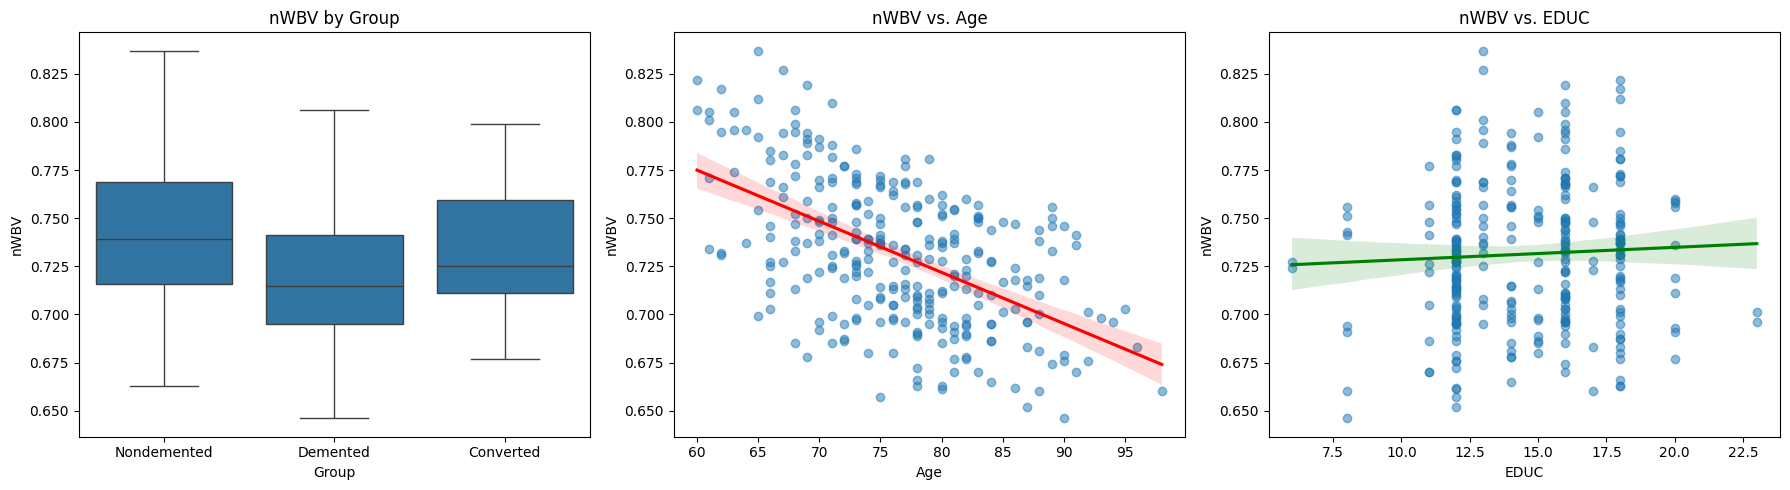

In [40]:
# Create output plots for RQ1

# Plot the fixed effects of group, age, and education on nWBV
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot for 'Group'
sns.boxplot(x='Group', y='nWBV', data=df, ax=ax[0])
ax[0].set_title('nWBV by Group')

# Plot for 'Age'
sns.regplot(x='Age', y='nWBV', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('nWBV vs. Age')

# Plot for 'EDUC'
sns.regplot(x='EDUC', y='nWBV', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'green'}, ax=ax[2])
ax[2].set_title('nWBV vs. EDUC')

plt.tight_layout()
plt.show()

- nWBV by Group: The boxplot indicates the median and the distribution of nWBV across the different groups. The non-demented group has a slightly higher median nWBV compared to the demented group, and the 'Converted' group seems to have a median value that falls in between the two. The 'Converted' group likely represents individuals who converted from non-demented to demented status during the study.


- nWBV vs. Age: The scatter plot with a regression line shows a negative relationship between age and nWBV, indicating that as age increases, nWBV tends to decrease. The red regression line and the shaded area (confidence interval) help visualize this trend.


- nWBV vs. EDUC: The scatter plot here does not show a clear relationship between education (EDUC) and nWBV. The green regression line is relatively flat, suggesting that variations in education levels do not have a strong effect on nWBV. The confidence interval also suggests uncertainty about the slope of the relationship.


In [45]:
# Perform Levene's test for homogeneity of variances across the groups
levene_stat, levene_pvalue = levene(
    df['nWBV'][df['Group'] == 'Demented'],
    df['nWBV'][df['Group'] == 'Nondemented']
)

levene_result = "Variances are homogeneous." if levene_pvalue > 0.05 else "Variances are not homogeneous."

levene_stat, levene_pvalue, levene_result

(1.8070072724400492, 0.18001294997922923, 'Variances are homogeneous.')

Levene's Test: The test statistic is approximately 1.78 with a p-value of 0.183. This suggests that the variances are homogeneous across the demented and non-demented groups, which meets one of the assumptions of ANOVA.


In [47]:
# Set the parameters for the power analysis
effect_size = 0.7  # Effect size of 0.7 specified in the assignment
alpha = 0.05       # Significance level
power = 0.91       # Power of the test

# Create an object of TTestIndPower to calculate sample size
power_analysis = TTestIndPower()

# Calculate sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')

sample_size

45.45073088568017

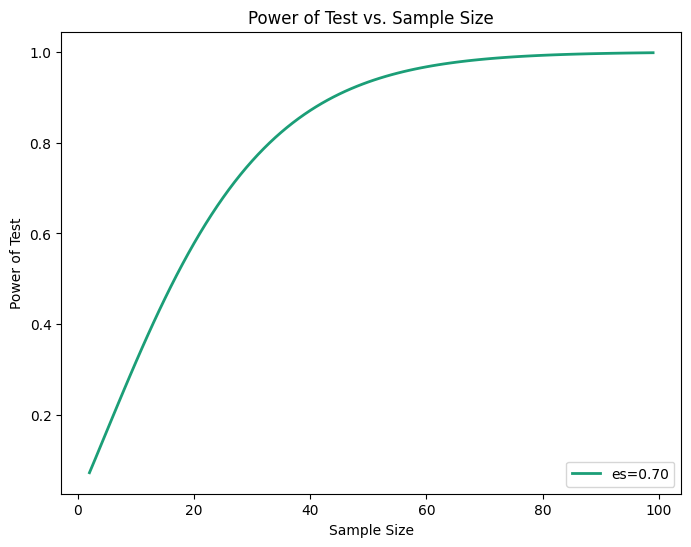

In [48]:
#Plot for Power Analysis

fig, ax = plt.subplots(figsize=(8, 6))
power_analysis.plot_power(dep_var='nobs', nobs=np.arange(2, 100), effect_size=[effect_size], alpha=alpha, ax=ax)
plt.title('Power of Test vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power of Test')

# Displaying the sample size calculated
plt.show()

The power analysis plot illustrates how the power of the test increases with the sample size for an effect size of 0.7 and an alpha level of 0.05. According to the analysis, a sample size of approximately 46 participants (rounded up from 45.45) is needed in each group to achieve a power of 0.91 for detecting an effect size of 0.7 with a significance level of 0.05.

# RQ2: Does the progression of dementia (as indicated by the increase in CDR over time) correlate with a decrease in brain volume?

In [49]:
# Build the model for RQ2
# Here we're looking at CDR as a fixed effect and 'Subject ID' as a random effect, with no control variables.
model_r2 = mixedlm("nWBV ~ CDR", df, groups=df["Subject ID"])
result_r2 = model_r2.fit()

# Output the model summary
result_r2.summary()

C:\Users\ftuzz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
        Mixed Linear Model Regression Results
======================================================
Model:            MixedLM Dependent Variable: nWBV    
No. Observations: 294     Method:             REML    
No. Groups:       150     Scale:              0.0001  
Min. group size:  1       Log-Likelihood:     689.1746
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   0.739    0.003 238.379 0.000  0.732  0.745
CDR        -0.024    0.004  -5.665 0.000 -0.032 -0.015
Group Var   0.001    0.020                            
======================================================

"""

- The coefficient for CDR is -0.025 with a p-value of less than 0.001, indicating a statistically significant negative relationship between CDR score and nWBV. As the CDR score increases, which indicates a progression in dementia, there is a significant decrease in nWBV.
- The intercept is 0.739, which represents the estimated nWBV when the CDR score is zero (absence of dementia).

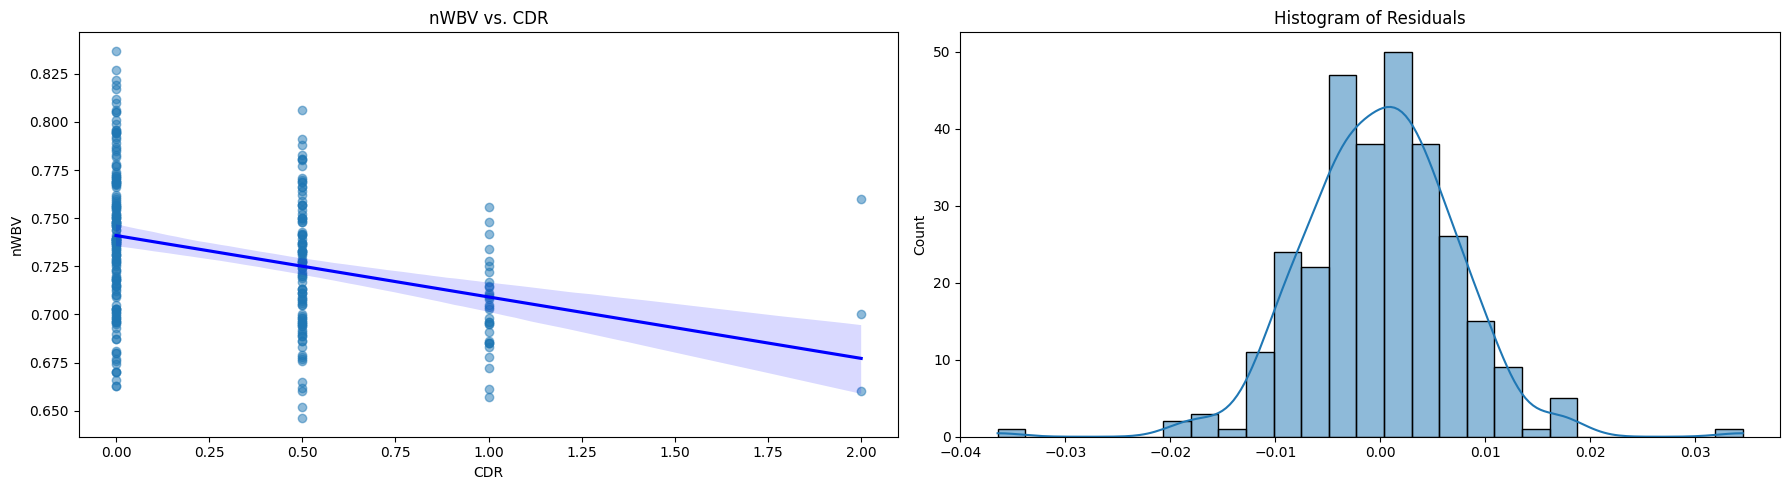

In [50]:
#Output plots

# Set up  figure
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Scatter plot with regression line for nWBV vs. CDR
sns.regplot(x='CDR', y='nWBV', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'blue'}, ax=axes[0])
axes[0].set_title('nWBV vs. CDR')

# Create residuals plot
residuals_r2 = result_r2.resid
sns.histplot(residuals_r2, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Residuals')

plt.tight_layout()
plt.show()

- nWBV vs. CDR: The scatter plot with a regression line shows a negative relationship between the Clinical Dementia Rating (CDR) and normalized Whole Brain Volume (nWBV), confirming the results of the mixed-effects model. As the CDR score increases, nWBV decreases.

- Histogram of Residuals: The histogram shows the distribution of the residuals from the model. The distribution does not appear to be perfectly bell-shaped, suggesting potential deviation from normality.



In [51]:
# Homogeneity of variances test for RQ2 model using Levene's test
# Since there are multiple CDR scores, we take two groups with the most number of observations for comparison
levene_stat_r2, levene_pvalue_r2 = levene(
    df['nWBV'][df['CDR'] == 0.0],
    df['nWBV'][df['CDR'] == 0.5]
)

levene_stat_r2, levene_pvalue_r2

(1.1607820903151576, 0.2823136555410028)

Homogeneity of Variances (Levene's Test): The test statistic is approximately 1.16 with a p-value of 0.282, suggesting that the variances are homogeneous between groups with CDR scores of 0.0 and 0.5.

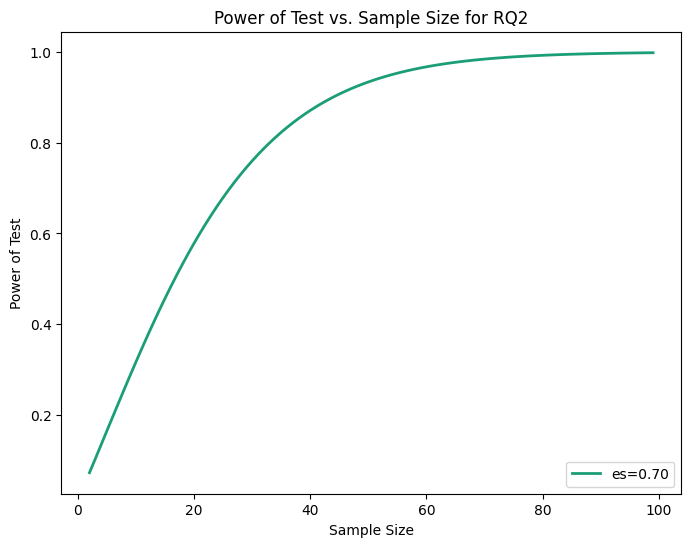

(45.45073088568017, None)

In [53]:
# Calculate sample size required for the power analysis with the same parameters as RQ1
sample_size_r2 = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')

# Display the sample size and plot the power analysis graph
sample_size_r2, plt.show()

# Power curve plot
fig, ax = plt.subplots(figsize=(8, 6))
power_analysis.plot_power(dep_var='nobs', nobs=np.arange(2, 100), effect_size=[effect_size], alpha=alpha, ax=ax)
plt.title('Power of Test vs. Sample Size for RQ2')
plt.xlabel('Sample Size')
plt.ylabel('Power of Test')

sample_size_r2, plt.show()

The power analysis for RQ2 indicates that a sample size of approximately 46 participants in each group is needed to achieve a power of 0.91 for detecting an effect size of 0.7 with a significance level of 0.05, similar to RQ1. 

The power curve plot confirms that with the sample size of around 46, the power of the test (the probability of correctly rejecting the null hypothesis) is just above 0.91, which is considered a robust power level for statistical tests.